# Gram-Schmidt Orthogonalization Method

グラム・シュミットの直交化法をjuliaで実装し，正規直交系が得られる原理を確認している．

In [89]:
using PyPlot
using TensorOperations

In [84]:
#ベクトルの数
N = 3
#ベクトルの次元
dim = 3

#はじめに与えるランダムな要素を持つベクトル．もちろん非直交
a = randn(Float64, (N, dim));
@tensor begin
    a_unortho[i,j] := a[i,k]*a[j,k]
end

3×3 Array{Float64,2}:
  5.82285   1.58438  -5.16127
  1.58438   1.15907  -3.47229
 -5.16127  -3.47229  11.6818 

1. $a_1$を正規化して$q_1$とする
2. $a_2$と$q_1$の内積をとる($r_{2,1}=q_1 \cdot a_2$)．この値を$q_1$にかけた$r_{2,1}q_1$が，$a_2$に含まれる$q_1$方向成分である
3. したがって，2で作成した$r_{2,1}q_1$を$a_2$から引けば($a_2-r_{2,1}q_1$)，これは$q_1$と直交するベクトル$\tilde{q}$となる　　
    >$q_1$と$\tilde{q}$の直交性は，$\tilde{q}\cdot q_1 = (a_2-r_{2,1}q_1)\cdot q_1 = a_2\cdot q_1 - (q_1\cdot a_2)q_1\cdot q_1 = 0$からわかる．ただし，$q_1$が正規化されていることを用いた．
4. $\tilde{q}_2$のノルム(普通の空間であれば$||\tilde{q}_2||:=\sqrt{\tilde{q}_2\cdot \tilde{q}_2}$でいい)で$\tilde{q}_2$を割ったものを，新たに$q_2$とすれば，直交する二つ目のベクトルができた
5. 次の直交成分を探すために，$a_3$と$q_1, q_2$の内積を取った値をそれぞれ$r_{3,1}, r_{3,2}$とする．これらに$q_1, q_2$をかけた$r_{3,i}q_i\ (i\in[1,2])$が$a_3$に含まれる$q_1, q_2$方向成分である．
6. したがって，5で作成した$r_{3,i}q_i$を$a_3$から引けば($a_3-\sum_{i=1}^2 r_{3,i}q_i$)，これは$q_1, q_2$と直交するベクトル$\tilde{q}_3$となる
7. $q_3 = \tilde{q}_3/||\tilde{q}_3||$は$q_1, q_2$と直交する正規化されたベクトルである．
8. 例示した$2\rightarrow 4$，$5\rightarrow 7$の手順を繰り返す

In [85]:
r = zeros(Float64, (N, N));
q = zeros(Float64, (N, dim));
qt = zeros(Float64, (N, dim))

r[1,1] = norm(a[1,:])
q[1,:] = a[1,:]/r[1,1]

for n = 1:N-1
    sum_rq = zeros(dim);
    println(n+1)
    for i = 1:n
        r[i,n+1] = dot(q[i,:], a[n+1,:]);
        sum_rq += r[i,n+1]*q[i,:]
    end
    qt[n+1,:] = a[n+1, :]-sum_rq
    norm_qt = norm(qt[n+1,:])
    q[n+1,:] = qt[n+1,:]/norm_qt
    println(q[n+1,:])
end

2
[-0.0846552, 0.971373, -0.221966]
3
[0.624739, 0.225285, 0.747628]


こうして作られた$N$個のベクトル$q_i$が互いに直交していることは以下の図や直接内積を計算した結果を格納している行列の値より確認可能．

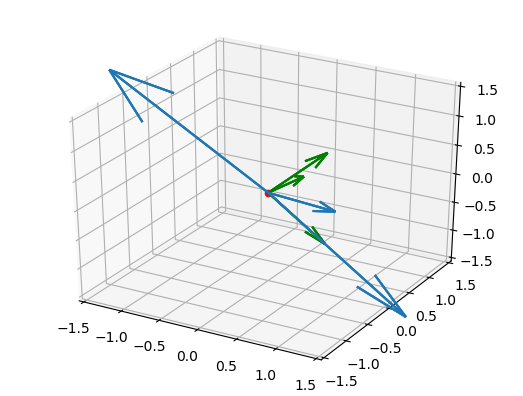

(-1.5, 1.5)

In [90]:
#trueを与えると，別のウィンドウでグラフを触れ，直交性の確認が容易．
pygui(false)
fig = figure()
ax = fig[:gca](projection="3d")
ax[:scatter3D](0.0, 0.0, 0.0, color="r")
ax[:quiver](zeros((N,dim)), zeros((N,dim)), zeros((N,dim)), a[:,1], a[:,2], a[:,3])
ax[:quiver](zeros((N,dim)), zeros((N,dim)), zeros((N,dim)), q[:,1], q[:,2], q[:,3], color="g")
L = 1.5
xlim([-L, L])
ylim([-L, L])
zlim([-L, L])
#quiv = quiver(zeros(3)', zeros(3)', zeros(3)',q[:,1],q[:,2],q[:,3])

In [88]:
@tensor begin
    Q[i,j] := q[i,k]*q[j,k]
end

3×3 Array{Float64,2}:
  1.0          -4.40197e-17  8.23474e-17
 -4.40197e-17   1.0          3.13085e-16
  8.23474e-17   3.13085e-16  1.0        